In [2]:
from cmath import nan
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from helpers_DF import *
import matplotlib.animation as animation
from matplotlib import rcParams
from IPython.display import HTML
rcParams['animation.embed_limit'] = 60
from matplotlib import colors as mcolors
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import plotly.graph_objects as go
import os

In [3]:
directory_path = "sim_data"
# List all the .npy files in the directory
all_files = [f for f in os.listdir(directory_path) if f.endswith('.npy')]

kstep=10


In [4]:
# Sort the files based on the starting step (this assumes the naming convention you've used)
sorted_files = sorted(all_files, key=lambda x: int(x.split('_')[2].split('.')[0]))

# List to store data from each file
data_list = []

# Loop through each sorted file, load the data, and add it to the list
for filename in sorted_files:
    full_path = os.path.join(directory_path, filename)
    data = np.load(full_path, allow_pickle=True)
    data_list.append(data)

# Convert the list of arrays into a numpy array of arrays
all_data = np.array(data_list, dtype=object)

data_save = np.concatenate(all_data)

In [5]:
species=data_save[-1][:,1]
np.shape(species)
print("Injection of 10000 particles")
print("Number of Primary Monomers =", np.sum(species==1))
print("Number of Primary Dimers =", np.sum(species==2))
print("Number of Primary Trimers =", np.sum(species==3))
print("Number of Secondary Monomers =", np.sum(species==4))
print("Number of Secondary Dimers =", np.sum(species==5))
print("Number of Neutrals =", np.sum(species==0))

Injection of 10000 particles
Number of Primary Monomers = 4014
Number of Primary Dimers = 3800
Number of Primary Trimers = 1942
Number of Secondary Monomers = 235
Number of Secondary Dimers = 0
Number of Neutrals = 247


# 2D 

FileNotFoundError: [Errno 2] No such file or directory: 'figures/2D_small.png'

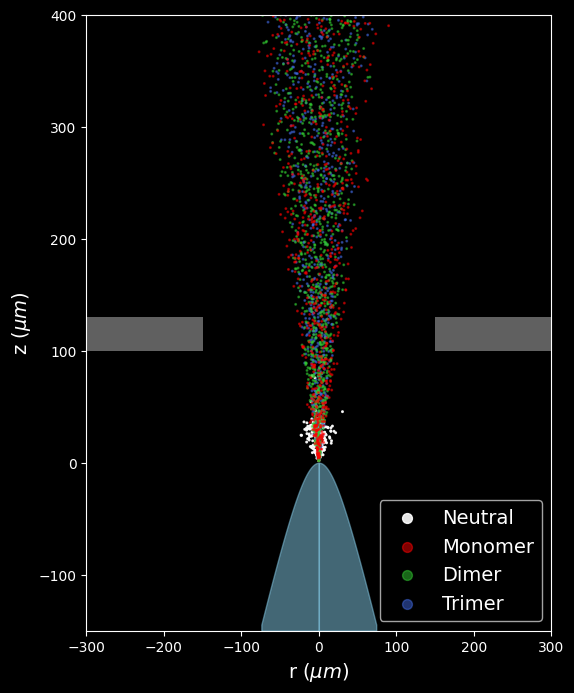

In [6]:
label_map = {
    0: "Neutral",
    1: "Monomer",
    4: "Monomer",
    2: "Dimer",
    5: "Dimer",
    3: "Trimer"
}

color_map = {
    "Neutral": "white",
    "Monomer": "red",
    "Dimer": "limegreen",
    "Trimer": "royalblue"
}

alpha_map = {
    "Neutral": 0.9,
    "Monomer": 0.5,
    "Dimer": 0.5,
    "Trimer": 0.5
}

zorder_map = {
    "Neutral": 3,
    "Monomer": 1,
    "Dimer": 2,
    "Trimer": 0
}


col_list = [
    mcolors.to_rgba(color_map[label_map[spec]], alpha=alpha_map[label_map[spec]]) 
    for spec in species[:-1]
]

zorder_list = [zorder_map[label_map[spec]] for spec in species[:-1]]

fig = plt.figure(figsize=(6,8), facecolor='black')
ax = fig.add_subplot(111, facecolor='black')
#fig, ax = plt.subplots()
# Plot the extractor grid
p1 = (150, 100)
p2 = (150, 130)
p3 = (300, 100)
p4 = (300, 130)
width = p3[0]-p1[0]
height = p2[1]-p1[1]
rect1 = mpatches.Rectangle((p1[0],p1[1]), width, height, facecolor ='silver', alpha=0.5)
p1 = (-150, 100)
p2 = (-150, 130)
p3 = (-300, 100)
p4 = (-300, 130)
width = p3[0]-p1[0]
height = p2[1]-p1[1]
rect2 = mpatches.Rectangle((p1[0],p1[1]), width, height, facecolor ='silver', alpha=0.5)

#Plot the tip of the emitter
r_tip=np.arange(0,75,1)
d=100
Rc=11
eta0=np.power(1+Rc/d,-1/2)
a=2*d*np.sqrt(1+Rc/d)
z_tip=100-eta0*np.sqrt(np.power(a,2)/4+np.power(r_tip,2)/(1-np.power(eta0,2)))
l, = ax.plot([],[])
#xmax=np.nanmax(pos_save[:,0,-1])*1e6

ax.clear()
ax.axis([-300,300,-150,400])
final_pos = data_save[-1]
xx = final_pos[:,2]*1e6
zz = final_pos[:,4]*1e6
subset_length = len(species) - 1
xx_subset = xx[:subset_length]
zz_subset = zz[:subset_length]

ax.scatter(xx_subset, zz_subset, s=5, c=col_list,marker='.')

ax.add_patch(rect1)
ax.add_patch(rect2)
plt.fill_between(r_tip+0.1, z_tip,-150, color='skyblue', alpha=0.5)
plt.fill_between(-r_tip-0.1, z_tip,-150, color='skyblue', alpha=0.5)
plt.xlabel("r ($\mu m$)",fontsize=14,color='white')
plt.ylabel("z ($\mu m$)",fontsize=14,color='white')
ax.tick_params(axis='both', colors='white')
# Set spine colors
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')


#Add legends

unique_labels = ["Neutral", "Monomer", "Dimer", "Trimer"]

for label in unique_labels:
    plt.scatter([], [], color=mcolors.to_rgba(color_map[label], alpha=alpha_map[label]), s=50, label=label)

# Create the legend first
leg = plt.legend(loc='lower right',fontsize=14)
# Set the background color to black
leg.get_frame().set_facecolor('black')
# Set the text color of each legend text item to white
for text in leg.get_texts():
    text.set_color('white')

# Display the legend
#plt.legend(loc='best')
plt.savefig('figures/2D_small.png', dpi=100)

## Animation

In [38]:
label_map = {
    0: "Neutral",
    1: "Monomer",
    4: "Monomer",
    2: "Dimer",
    5: "Dimer",
    3: "Trimer"
}

color_map = {
    "Neutral": "white",
    "Monomer": "red",
    "Dimer": "limegreen",
    "Trimer": "royalblue"
}

alpha_map = {
    "Neutral": 0.9,
    "Monomer": 0.5,
    "Dimer": 0.5,
    "Trimer": 0.5
}

zorder_map = {
    "Neutral": 3,
    "Monomer": 1,
    "Dimer": 2,
    "Trimer": 0
}



for i in range(np.size(data_save)):
    fig = plt.figure(figsize=(6,8), facecolor='black')
    ax = fig.add_subplot(111, facecolor='black')
    #fig, ax = plt.subplots()
    # Plot the extractor grid
    p1 = (150, 100)
    p2 = (150, 130)
    p3 = (300, 100)
    p4 = (300, 130)
    width = p3[0]-p1[0]
    height = p2[1]-p1[1]
    rect1 = mpatches.Rectangle((p1[0],p1[1]), width, height, facecolor ='silver', alpha=0.5)
    p1 = (-150, 100)
    p2 = (-150, 130)
    p3 = (-300, 100)
    p4 = (-300, 130)
    width = p3[0]-p1[0]
    height = p2[1]-p1[1]
    rect2 = mpatches.Rectangle((p1[0],p1[1]), width, height, facecolor ='silver', alpha=0.5)

    #Plot the tip of the emitter
    r_tip=np.arange(0,75,1)
    d=100
    Rc=11
    eta0=np.power(1+Rc/d,-1/2)
    a=2*d*np.sqrt(1+Rc/d)
    z_tip=100-eta0*np.sqrt(np.power(a,2)/4+np.power(r_tip,2)/(1-np.power(eta0,2)))
    l, = ax.plot([],[])
    #xmax=np.nanmax(pos_save[:,0,-1])*1e6

    ax.clear()
    ax.axis([-300,300,-150,400])
    pos = data_save[i]
    xx = pos[:,2]*1e6
    zz = pos[:,4]*1e6
    subset_length = len(species) - 1
    xx_subset = xx[:subset_length]
    zz_subset = zz[:subset_length]
    
    col_list = [
    mcolors.to_rgba(color_map[label_map[spec]], alpha=alpha_map[label_map[spec]]) 
    for spec in species[:np.size(xx_subset)]
    ]

    zorder_list = [zorder_map[label_map[spec]] for spec in species[:np.size(xx_subset)]]

    ax.scatter(xx_subset, zz_subset, s=5, c=col_list,marker='.')

    ax.add_patch(rect1)
    ax.add_patch(rect2)
    plt.fill_between(r_tip+0.1, z_tip,-150, color='skyblue', alpha=0.5)
    plt.fill_between(-r_tip-0.1, z_tip,-150, color='skyblue', alpha=0.5)
    plt.xlabel("r ($\mu m$)",fontsize=14,color='white')
    plt.ylabel("z ($\mu m$)",fontsize=14,color='white')
    ax.tick_params(axis='both', colors='white')
    # Set spine colors
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')


    #Add legends

    unique_labels = ["Neutral", "Monomer", "Dimer", "Trimer"]

    for label in unique_labels:
        plt.scatter([], [], color=mcolors.to_rgba(color_map[label], alpha=alpha_map[label]), s=50, label=label)

    # Create the legend first
    leg = plt.legend(loc='lower right',fontsize=14)
    # Set the background color to black
    leg.get_frame().set_facecolor('black')
    # Set the text color of each legend text item to white
    for text in leg.get_texts():
        text.set_color('white')

    # Display the legend
    #plt.legend(loc='best')
    plt.savefig(f'figures_2D/2D_small_{i}.png', dpi=100)

/tmp/ipykernel_996222/1753019572.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(6,8), facecolor='black')


In [21]:
from matplotlib.animation import PillowWriter

# 3D

In [44]:
label_map = {
    0: "Neutral",
    1: "Monomer",
    4: "Monomer",
    2: "Dimer",
    5: "Dimer",
    3: "Trimer"
}

color_map = {
    "Neutral": "white",
    "Monomer": "red",
    "Dimer": "limegreen",
    "Trimer": "royalblue"
}

alpha_map = {
    "Neutral": 0.9,
    "Monomer": 0.5,
    "Dimer": 0.5,
    "Trimer": 0.5
}

zorder_map = {
    "Neutral": 3,
    "Monomer": 1,
    "Dimer": 2,
    "Trimer": 0
}


# Plot the emitter tip

r_tip = np.arange(0, 75, 10)
d = 100
Rc = 11
eta0 = np.power(1 + Rc / d, -1 / 2)
a = 2 * d * np.sqrt(1 + Rc / d)
z_tip = 100 - eta0 * np.sqrt(np.power(a, 2) / 4 + np.power(r_tip, 2) / (1 - np.power(eta0, 2)))

thetas = np.linspace(0, 2 * np.pi, 100)  # 360 degrees
rr, th = np.meshgrid(r_tip, thetas)
X3 = rr * np.cos(th)
Y3 = rr * np.sin(th)
Z3 = 100 - eta0 * np.sqrt(np.power(a, 2) / 4 + np.power(rr, 2) / (1 - np.power(eta0, 2)))

# Parameters for the circle
radius_cicle = 150
center_cicle = (0, 0, 100)
x_cicle = center_cicle[0] + radius_cicle * np.cos(thetas)
y_cicle = center_cicle[1] + radius_cicle * np.sin(thetas)
z_cicle = np.full_like(x_cicle, center_cicle[2])  # z-coordinates remain constan
z_cicle2 = np.full_like(x_cicle, center_cicle[2]-10)  
z_cicle3 = np.full_like(x_cicle, center_cicle[2]-20)  


pos_index=np.where(y_cicle>0)

for i in range(np.size(data_save)):
    fig = plt.figure(figsize=(6,6), dpi=80, facecolor='k')
    ax = plt.axes([0.1, 0.1, 5/6, 5/6], projection='3d', facecolor='black')
    grid = plt.GridSpec(1, 1, wspace=0.0, hspace=0.3)
    ax.tick_params(colors='white')
    ax.set(xlim=(-300, 300), ylim=(-300, 300),zlim=(-150, 250))
    ax.view_init(elev=15, azim=70)

 




    ax.plot_surface(X3, Y3, Z3, color='skyblue', alpha=1)

    current_pos = data_save[i]
    xx = current_pos[:,2]*1e6
    yy = current_pos[:,3]*1e6
    zz = current_pos[:,4]*1e6


    col_list = [
        mcolors.to_rgba(color_map[label_map[spec]], alpha=alpha_map[label_map[spec]]) 
        for spec in species[:np.size(xx)]
        ]
    ax.scatter(xx,yy,zz,s=5, c=col_list)
    
    ax.plot(x_cicle, y_cicle, z_cicle, alpha=1, color="k",linewidth=10)
    ax.plot(x_cicle, y_cicle, z_cicle2, alpha=1, color="k",linewidth=10)
    
    ax.plot(x_cicle[pos_index] ,y_cicle[pos_index], z_cicle[pos_index], alpha=1, color="k",linewidth=10,zorder=10)
    ax.plot(x_cicle[pos_index] ,y_cicle[pos_index], z_cicle2[pos_index], alpha=1, color="k",linewidth=10,zorder=10)
    
    
    ax.plot_surface(X3, Y3, Z3, color='skyblue', alpha=1)
    
    
    
    ax.set(xlim=(-300, 300), ylim=(-300, 300),zlim=(-150, 250))
    plt.title('Number of injected particles: %i' %(10*i), fontsize=16, color='w')
    #plt.legend(handles=[mono_patch, dim_patch,trim_patch], loc='upper right')
    ax.set_aspect('auto', 'box')
    ax.set_xlabel('X axis ($\mu m$)', color='white')
    ax.set_ylabel('Y axis ($\mu m$)', color='white')
    ax.set_zlabel('Z axis ($\mu m$)', color='white')
    ax.view_init(elev=12, azim=70)
    plt.savefig(f'figures_3D/3D_small_{i}.png', dpi=100)
    plt.close()